<a href="https://colab.research.google.com/github/miramnair/German-credit-risk-classification-using-Machine-Learning-Algorithms/blob/main/Python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 5> ***German Credit Data Machine Learning Model***</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import resample,shuffle
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_regression
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import time
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [ ]:
#import the dataset
credit_data = pd.read_csv('/Users/meeranair/Downloads/german.data',header = None,delim_whitespace = True)
#assign column names
credit_data.columns = ["checking_acc","duration_month","credit_hist","purpose","credit_amount","savings","employment_history","installment_rate","sex","loan_status","resident_since","property","age","installment_plan","housing_type","existing_cards","job","liability_count","telephone","foreign_worker","credit_score"]

#view first 5 rows
credit_data.head(5)

,checking_acc,duration_month,credit_hist,purpose,credit_amount,savings,employment_history,installment_rate,sex,loan_status,...,property,age,installment_plan,housing_type,existing_cards,job,liability_count,telephone,foreign_worker,credit_score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit_data.shape

(1000, 21)

***checking_acc*** : Status of existing checking account </br>
               A11 :      ... <    0 DM</br>
	           A12 : 0 <= ... <  200 DM</br>
	           A13 :      ... >= 200 DM  </br>
	           A14 : no checking account</br>


***duration_month***:	Duration of loan in months   </br>

***credit_hist*** :	Credit history of the applicant</br>
               A30 : no credits taken/all credits paid back duly</br>
               A31 : all credits at this bank paid back duly</br>
	           A32 : existing credits paid back duly till now</br>
               A33 : delay in paying off in the past</br>
	           A34 : critical account/other credits existing (not at this bank)</br>

***purpose***	:Purpose of  the loan</br>
          A40 : car (new) </br>
	      A41 : car (used)</br>
	      A42 : furniture/equipment</br>
	      A43 : radio/television</br>
	      A44 : domestic appliances</br>
	      A45 : repairs</br>
	      A46 : education</br>
	      A47 : vacation </br>
	      A48 : retraining</br>
	      A49 : business</br>
	      A410 : others</br>

***credit_amount***	:Credit amount</br>

***savings***	:Savings account/bonds</br>
          A61 :          ... <  100 DM</br>
	      A62 :   100 <= ... <  500 DM</br>
	      A63 :   500 <= ... < 1000 DM</br>
	      A64 :          .. >= 1000 DM</br>
          A65 :   unknown/ no savings account</br>

***employment_history***	:Present employment since (years)</br>

***installment_rate***:Installment rate in percentage of disposable income</br>

***sex***	:Male/Female</br>

***loan_status***: Other debtors / guarantors for the applicant</br>
          A101 : none</br>
	      A102 : co-applicant</br>
	      A103 : guarantor</br>

***resident_since***	:Present residence since</br>

***property***:	Property type of applicant</br>
          A121 : real estate</br>
	      A122 : if not A121 : building society savings agreement/life insurance</br>
          A123 : if not A121/A122 : car or other</br>
	      A124 : unknown / no property</br>

***age*** :	Age in years</br>

***installment_plan***:	Other installment plans</br>
 	      A141 : bank</br>
	      A142 : stores</br>
	      A143 : none</br>


***housing_type***	:Rent, own or for free</br>
          A151 : rent</br>
	      A152 : own</br>
	      A153 : for free</br>

***existing_cards*** :	Number of existing credits at this bank</br>

***job***	 : unskilled nonresident, unskilled resident, skilled or highly skilled</br>
          A171 : unemployed/ unskilled  - non-resident</br>
	      A172 : unskilled - resident</br>
	      A173 : skilled employee / official</br>
	      A174 : management/ self-employed/highly qualified employee/ officer</br>

***liability_count*** : Number of people being liable to provide maintenance for</br>

***telephone*** :Is the Telephone registered or not - yes/no</br>

***foreign_worker*** :Is the applicant a foreign worker – yes/no</br>

***credit_score*** :  Whether the issued loan was a good decision or bad</br>

<font size = 5> **Data Imputation : Check if the cells have any Nan's or zeros** </font>

In [ ]:
#check for Null values
nan_count = credit_data.isnull().any()
print(nan_count)

checking_acc          False
duration_month        False
credit_hist           False
purpose               False
credit_amount         False
savings               False
employment_history    False
installment_rate      False
sex                   False
loan_status           False
resident_since        False
property              False
age                   False
installment_plan      False
housing_type          False
existing_cards        False
job                   False
liability_count       False
telephone             False
foreign_worker        False
credit_score          False
dtype: bool


In [ ]:
#check for zero's
zeros = 0
for name in credit_data.columns:
    if(credit_data[name]==0).any():
        zeros = zeros + 1
print("Number of zero's in the data:",zeros)



Number of zero's in the data: 0


In [ ]:
credit_data['credit_score'].replace([1,2], ['Good','Bad'], inplace=True)
credit_data['purpose'].replace(['A40','A41','A42','A43','A44','A45','A46','A47','A48','A49','A410'], ['Car','Car','Furniture/Equipment',
                                                                                                     'Radio/TV','Domestic Appliances',
                                                                                                     'Repairs','Education','Vacation','Retraining',
                                                                                                     'Business','Others'], inplace=True)
credit_data['checking_acc'].replace(['A11','A12','A13','A14'], ['NoIncome','Low','Moderate','NA'], inplace=True)
credit_data['savings'].replace(['A61','A62','A63','A64','A65'], ['Least','Moderate','Rich','Wealthy','NA'], inplace=True)
credit_data['sex'].replace(['A91','A93','A94','A92','A95'], ['Male','Male','Male','Female','Female'], inplace=True)
credit_data['foreign_worker'].replace(['A201','A202'], ['Yes','No'], inplace=True)
credit_data['job'].replace(['A171','A172','A173','A174'], ['unskilled nonresident','unskilled resident','skilled','highly skilled'], inplace=True)

<font size = 5, color = 'blue'> **Explore the dataset** </font>

<font size = 4> 1) Analyzing the classifier : credit_score</font>

In [ ]:
credit_data['credit_score'].value_counts()

Good    700
Bad     300
Name: credit_score, dtype: int64

<font size = 4, color='red'>** We can see an imbalance in the classification and hence we need to take care of it in the upcoming steps. **</font>

<font size = 4> 2) Analyzing categorical variables</font>

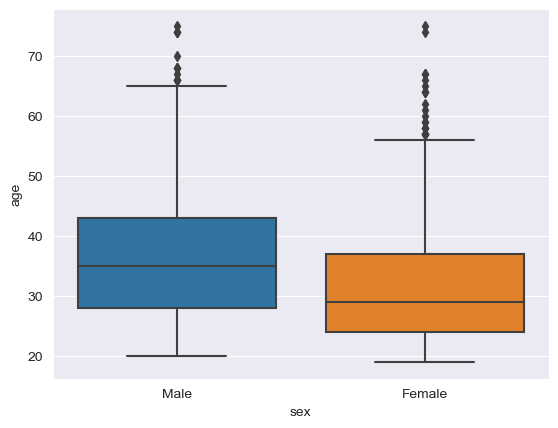

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(data = credit_data, x = 'sex', y = 'age')
plt.show()

<font size = 4> ***Observations***</font> <br>

<font size = 4> Average age of men who takes loan is slightly higher than women </font> <br>

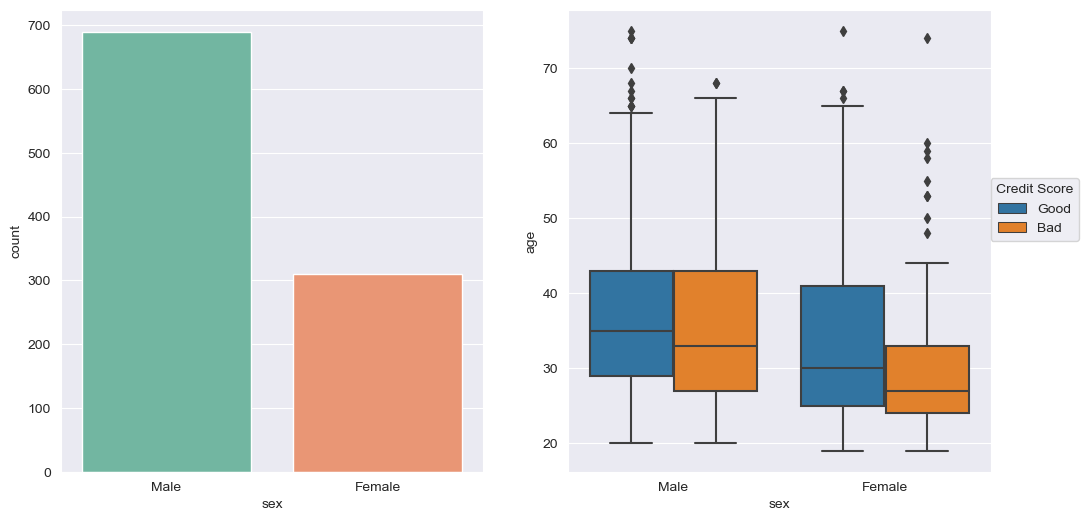

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.countplot(data = credit_data, x='sex',ax=ax1,palette="Set2")
sns.boxplot(data = credit_data, x = 'sex', y = 'age',ax=ax2,hue = 'credit_score')
plt.legend(title = 'Credit Score',loc=(1,.5))
plt.show()

<font size = 4> ***Observations***</font> <br>

<font size = 4>1) The dataset contains 690 rows on men and 310 rows on women </font> <br>

<font size = 4>2) Women have better credit score than men</font><br>

<font size = 4>3) Average age of men who takes loans is slightly higher than women</font>

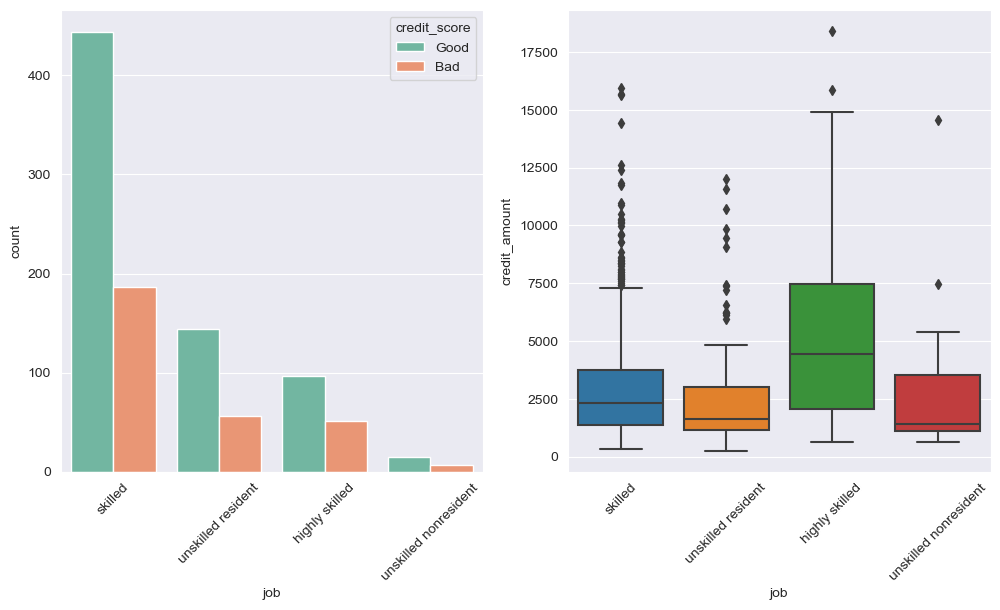

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.countplot(data = credit_data, x='job',ax=ax1,palette="Set2",hue='credit_score')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
sns.boxplot(data = credit_data, x = 'job', y = 'credit_amount',ax=ax2)
#plt.legend(title='Credit Score',loc=(1,.5))
#plt.xticks(rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()

<font size = 4> ***Observations***</font> <br>

<font size = 4> Highly skilled people are likely to take larger loan amounts </font> <br>

<font size = 4> Majority of skilled and unskilled workers have good credit scores.

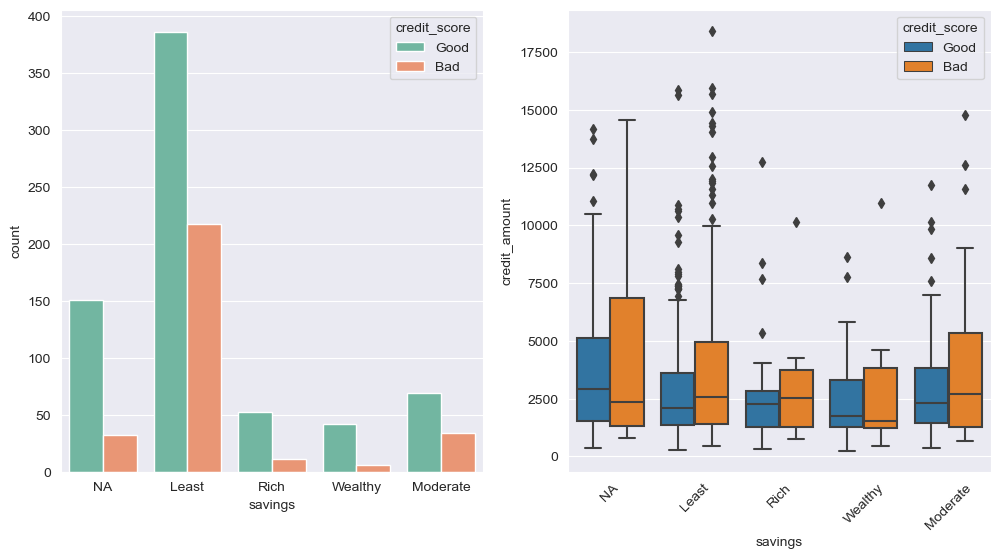

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.countplot(data = credit_data, x='savings',ax=ax1,palette="Set2",hue='credit_score')
#sns.histplot(data = credit_data, x = 'credit_amount',hue = 'savings',ax=ax2)
sns.boxplot(data = credit_data, x = 'savings', y = 'credit_amount',ax=ax2,hue='credit_score')
#plt.legend(title='Credit Score',loc=(1,.5))
#plt.xticks(rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()

<font size = 4> ***Observations***


<font size = 4>1) Applicants with least amount of savings or no accounts have applied for the loan the most.</font>
<br>
    
<font size = 4>2) They have also have applied for higher amounts.
<br>
    
<font size = 4>3) Applicants with highest loan amount have Bad credit score

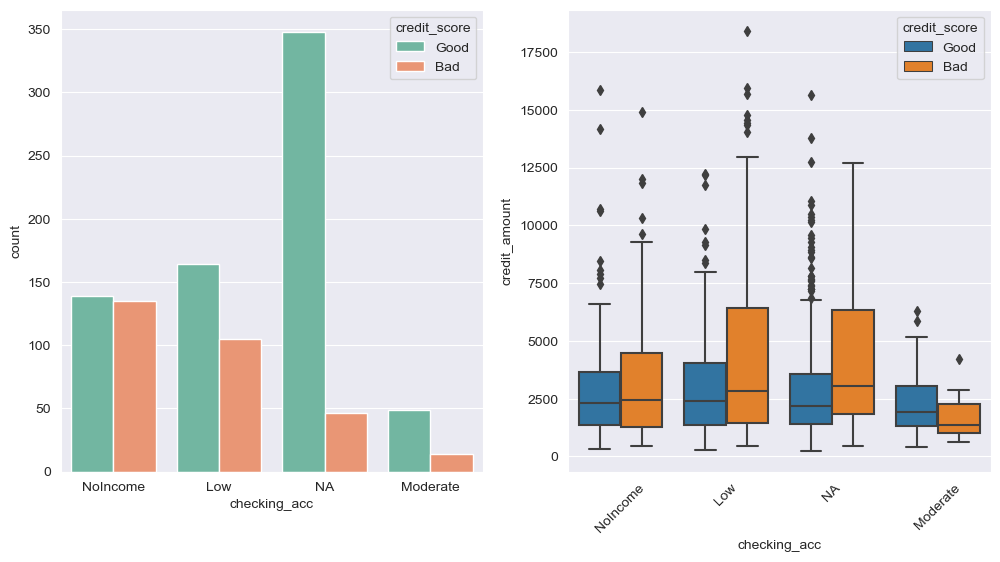

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.countplot(data = credit_data, x='checking_acc',ax=ax1,palette="Set2",hue='credit_score')
sns.boxplot(data = credit_data, x = 'checking_acc', y = 'credit_amount',ax=ax2,hue='credit_score')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()

<font size = 4> ***Observations*** </font>

<font size = 4>1) Applicants with no checking accounts have applied for the loan the most.</font> <br>

<font size = 4>2) They have also have applied for higher amounts along with low category.</font><br>

<font size = 4>3) Applicants with highest loan amount have Bad credit score</font>

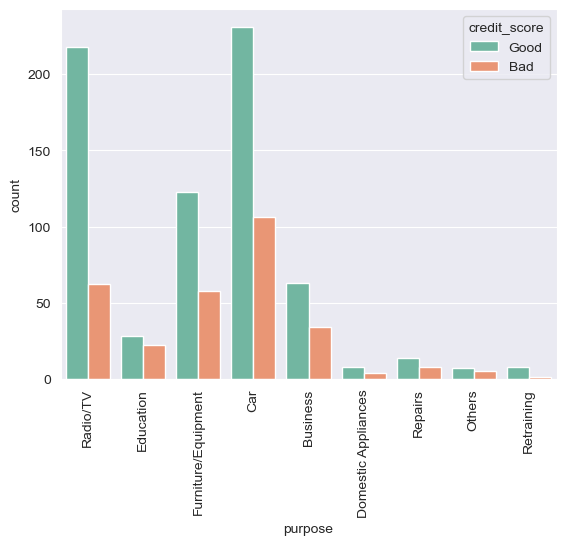

In [ ]:
sns.countplot(data = credit_data, x='purpose',palette="Set2",hue='credit_score')
plt.xticks(rotation=90)
plt.show()

<font size = 4> Most applicants have bought Radio/TV and Car with the loan</font>

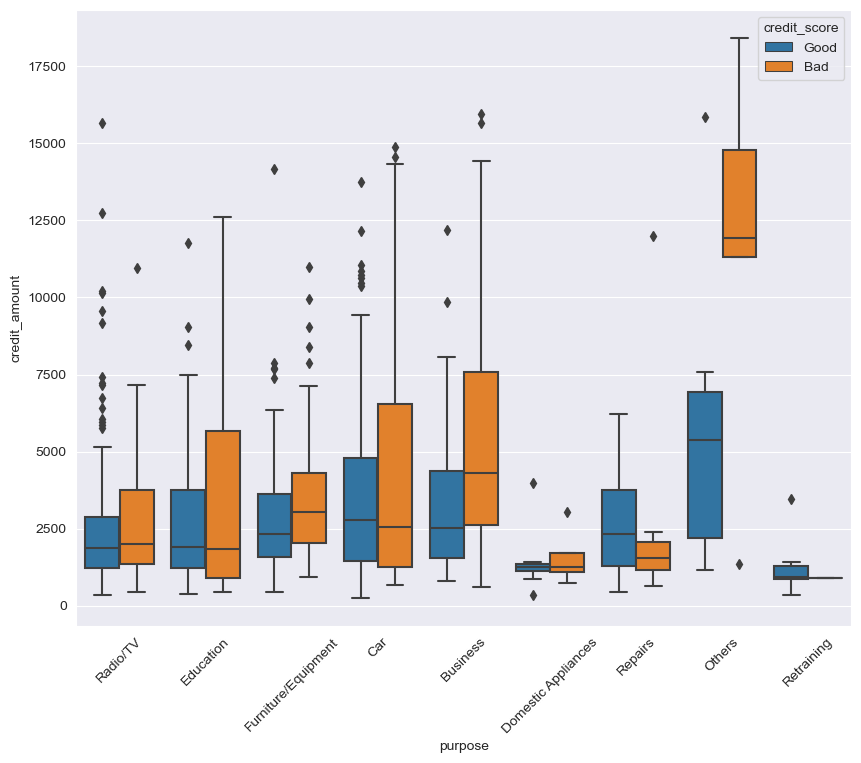

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = credit_data, x = 'purpose', y = 'credit_amount',hue='credit_score')
plt.xticks(rotation=45)
plt.show()

<font size = 4> ***Observations*** </font>

<font size = 4> 1) Loan amount for TV is very less - under 3000DM <br></font>

<font size = 4>  2) Car - moderately high amount : 1500DM - 6000DM</font>

In [ ]:
credit_data.describe()

,duration_month,credit_amount,installment_rate,resident_since,age,existing_cards,liability_count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<font size = 4> 3) Analyzing numerical variables</font>

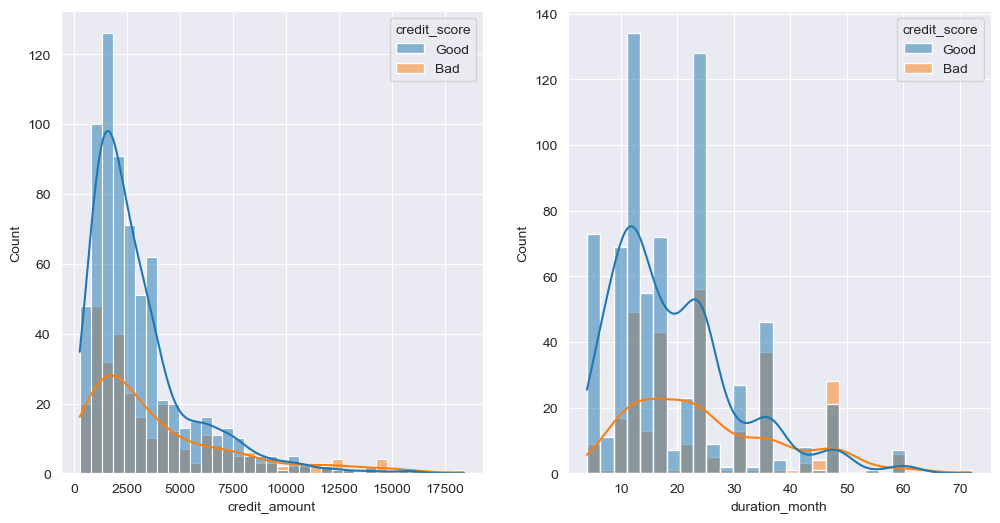

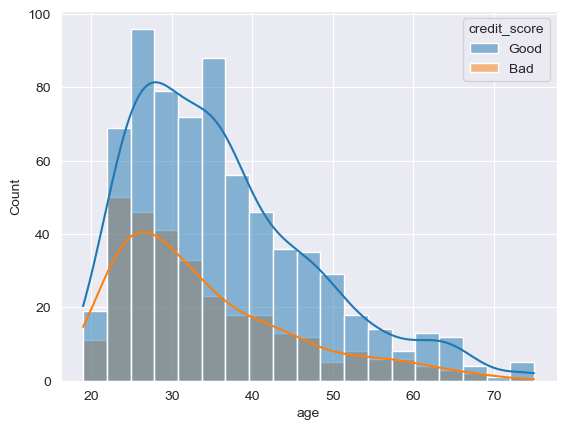

In [ ]:
sns.set_style("darkgrid")
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 6))
sns.histplot(data = credit_data, x = 'credit_amount', hue = 'credit_score',fill = True, kde=True,ax=ax1)
sns.histplot(data = credit_data, x = 'duration_month', hue = 'credit_score',fill = True, kde=True,ax=ax2)
plt.show()

sns.histplot(data = credit_data, x = 'age', hue = 'credit_score',fill = True, kde=True)
plt.show()

<font size = 4> ***Observations*** </font>

<font size = 4> 1) Most loan applicants are between the age of 25-35 </font><br>

<font size = 4> 2)Paid back in 10-20 months  </font> <br>

<font size = 4> 3) Credit amount : 1250DM - 3750DM </font>

<font size =10, color='blue'> Data Preparation </font>

<font size =4> SMOTENC and Oversampling Minority</font>

In [ ]:
#Split the classifier
y = credit_data['credit_score'].replace(['Good','Bad'],[1,0])
X = credit_data.drop(columns = 'credit_score')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: credit_score, Length: 1000, dtype: int64

In [ ]:
#SMOTENC
categories_index = list(X.columns.get_indexer(X.select_dtypes(include=['object']).columns))
sm = SMOTENC(random_state=42, categorical_features=categories_index)
X_smote, y_smote = sm.fit_resample(X, y)   #smote
print(f'Resampled dataset samples per class SMOTE technique',Counter(y_smote))

#Oversampling
oversample = RandomOverSampler(sampling_strategy='minority')  #oversample
X_over, y_over = oversample.fit_resample(X, y)
print('\nResampled dataset samples per class, resampling technique', Counter(y_over))

Resampled dataset samples per class SMOTE technique Counter({1: 700, 0: 700})

Resampled dataset samples per class, resampling technique Counter({1: 700, 0: 700})


In [ ]:
#Train, test split sampled data : both SMOTE and Upsampled data

X_train_smo, X_test_smo, y_train_smo, y_test_smo = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

<font size = 5>StandardScaler and OnehotEncoder <font> <br>
    
<font size = 3> The data has both categorical and numeric data. We need to scale numeric values and <br>
    convert categorical value to binary.</font>
    



In [ ]:
"""
def onehotencoder(name):
    ohe = OneHotEncoder(drop='first')
    feature_array = pd.DataFrame(ohe.fit_transform(credit_upscaled[[name]]).toarray())
    feature_labels = ohe.categories_
    feature_labels = np.array(feature_labels).ravel()
    for count, value in enumerate(feature_labels):
        feature_labels[count] = name + "_" + feature_labels[count]
    df = pd.DataFrame(feature_array)
    df.columns = feature_labels[1:]
    return df

new_credit_df = pd.DataFrame()
for name in categories_list:
    new_credit_df = pd.concat([new_credit_df,onehotencoder(name)],axis = 1)

credit_scaled = pd.concat([credit_int_scale,new_credit_df],axis = 1)



credit_int_scale = pd.DataFrame(StandardScaler().fit_transform(credit_upscaled[int_list]),columns = int_list)
credit_int_scale

xxx = pd.concat([credit_int_scale.reset_index(),credit_data[categories_list].reset_index()],axis = 1)
xxx.reset_index()
xxx
"""

<font size = 5, color = 'blue'>pipe -- > preprocess (scale and onehotencoder) + Feature reduction + modeling <font><br>
    


In [ ]:
def categorize(X):
    """ Get the list of categorical and numerical columns"""
    categories_list = list(X.select_dtypes(include=['object']).columns)
    categories_index = list(X.columns.get_indexer(X.select_dtypes(include=['object']).columns))
    int_list = list(X.select_dtypes(include=['int']).columns)
    return(categories_list,categories_index,int_list)

def scale_onehot(clf,categories_list,int_list):
    """ Pipeline : Scales numerical columns and converts categorical columns to binary digits"""
    numeric_features = int_list
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

    categorical_features = categories_list
    categorical_transformer = OneHotEncoder(drop='first')

    preprocessor = ColumnTransformer(transformers=[
        ("num_transform", numeric_transformer, numeric_features),
        ("cat_transform", categorical_transformer, categorical_features)])

    #feature selection
    model_name = type(clf).__name__
    if(model_name!='SVC'):
        feature_selection = RFE(estimator = clf, step = 5,importance_getter='feature_importances_',n_features_to_select =20)
    else:
        feature_selection = SelectKBest(f_classif, k=20)
    pipe = Pipeline(steps=[("preprocesser", preprocessor), ('feature selection',feature_selection),("classifier", clf)])

    return pipe

<font size =5> Why can't we perform PCA? </font>

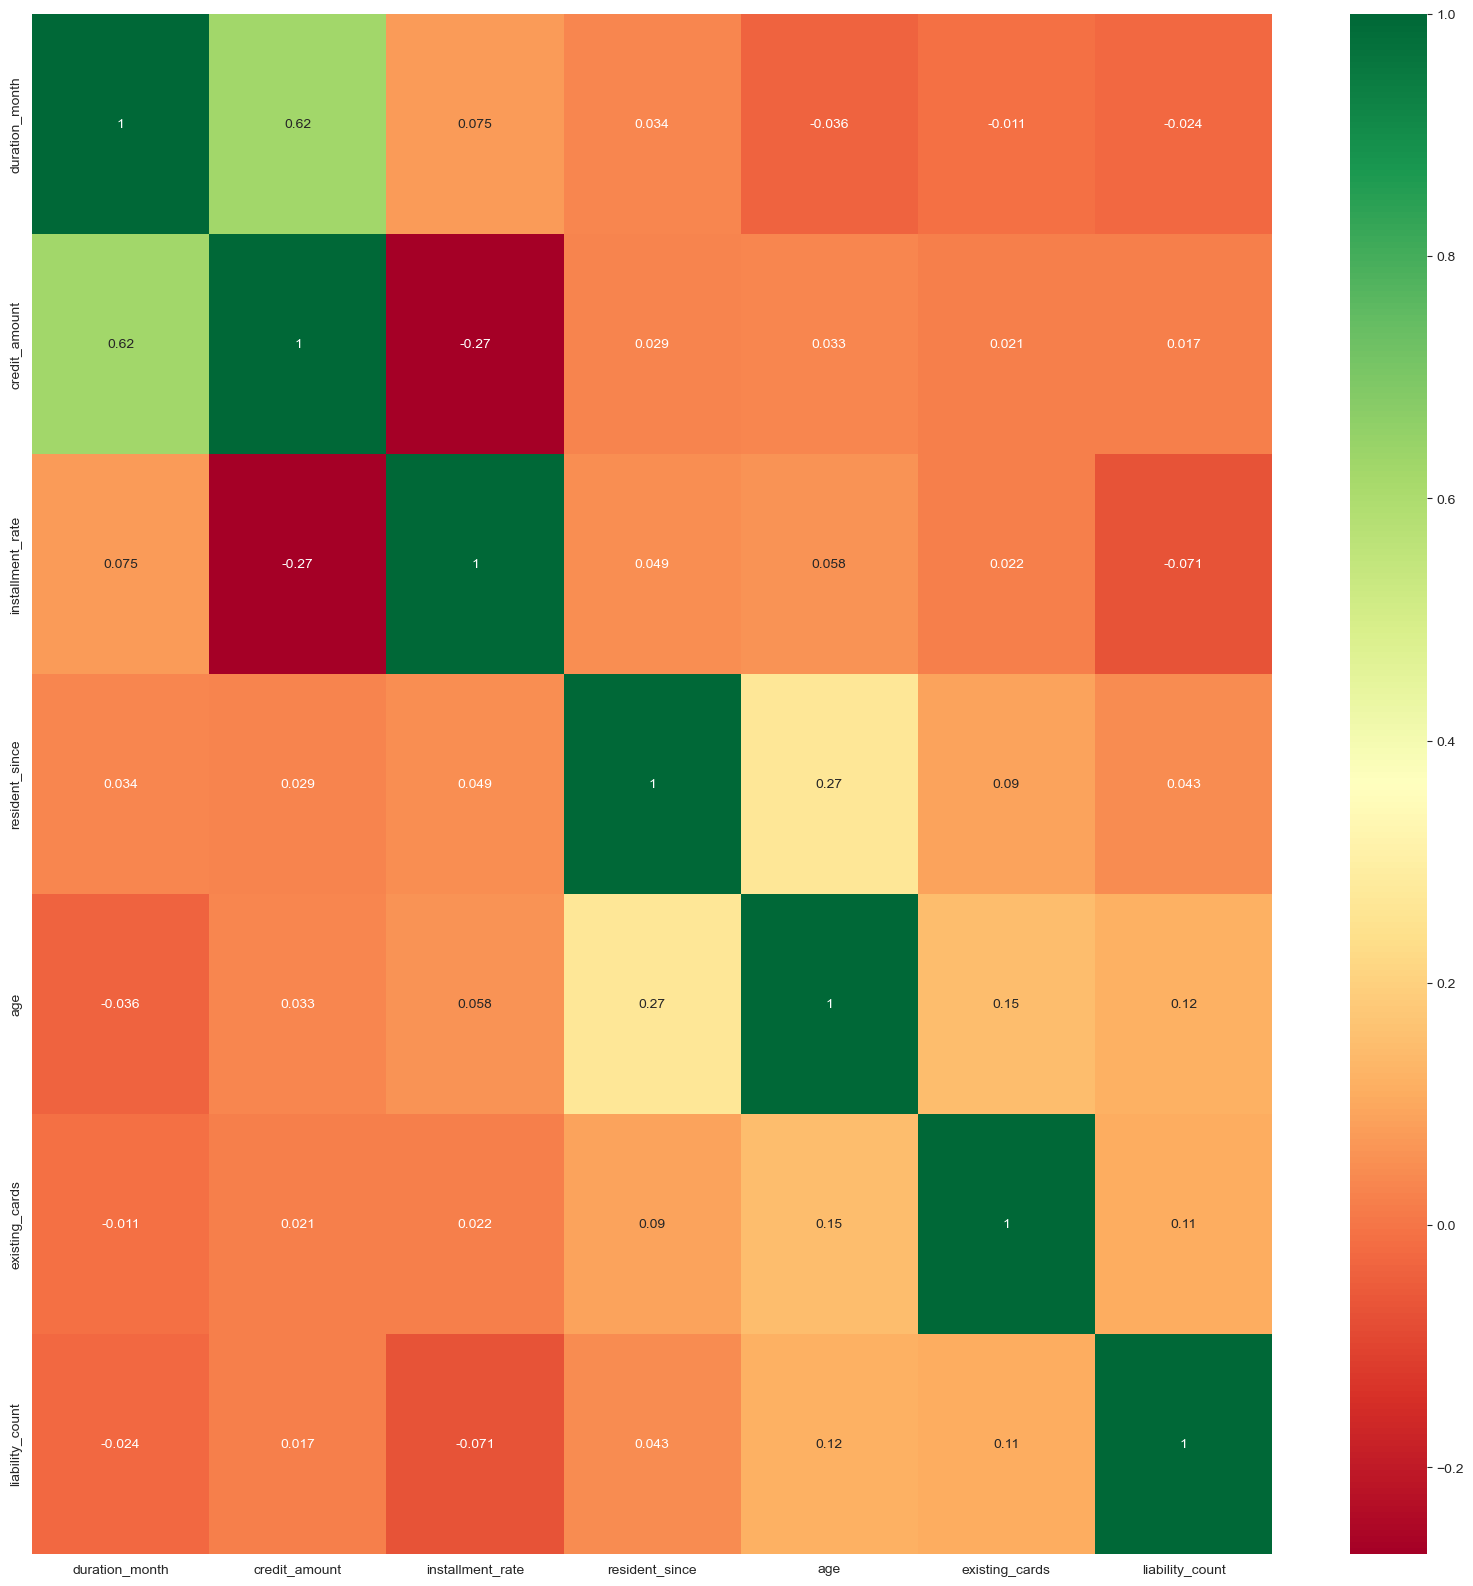

In [ ]:
#get correlations of each features in dataset
corrmat = credit_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(credit_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

<font size = 5> Generic function to fit and predict models after hypertuning </font>

In [ ]:

def after_tune(X_test,y_test,X_train,y_train,clf,params):
    """ Fit and predict models with Hypertuned parameters """
    CV = BayesSearchCV(pipe, search_spaces=params, cv= 5,random_state = 42)    #Hypertune
    CV.fit(X_train, y_train)                                                   #fit
    print("\n Best parameters for", clf, "are:",CV.best_params_)               #print best params
    pred_sampled = CV.predict(X_test)                                          #predict
    print("\n \n Accuracy of", clf ,"AFTER hyper parameter tuning: ",accuracy_score(y_test,pred_sampled))
    return(CV,pred_sampled)


<font size = 5> Which model to choose? </font>

<font size = 5> ***Model : Random forest***  </font> <br>

<font size = 3> Upsampled  data <font size = 3>

In [ ]:
#Run the generic functions

categories_list,categories_index,int_list = categorize(X_test_res)  #function call

clf = RandomForestClassifier(random_state = 42)  #set classifier
pipe = scale_onehot(clf,categories_list,int_list) #function call
pipe


Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     importance_getter='feature_importances_',
                     n_features_to_select=20, step=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
#after hypertune
params = {"classifier__max_depth": [10,12,15,16,17,20],
              "classifier__max_features": ['sqrt', 'log2', None],
              "classifier__n_estimators": [100,150,175,190,200,250],
              "classifier__criterion": ["gini", "entropy"]
              }

start_time = time.time()
CV_rfc,pred = after_tune(X_test_res,y_test_res,X_train_res,y_train_res,clf,params)    #function call
print("\n Time Taken - hypertuned model = ",(time.time()-start_time))


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



 Best parameters for RandomForestClassifier(random_state=42) are: OrderedDict([('classifier__criterion', 'gini'), ('classifier__max_depth', 16), ('classifier__max_features', 'sqrt'), ('classifier__n_estimators', 200)])

 
 Accuracy of RandomForestClassifier(random_state=42) AFTER hyper parameter tuning:  0.86

 Time Taken - hypertuned model =  299.1677887439728



**************Accuracy = 0.86 **************

**************F1-score = 0.8528528528528527 **************

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       167
           1       0.95      0.78      0.85       183

    accuracy                           0.86       350
   macro avg       0.87      0.86      0.86       350
weighted avg       0.87      0.86      0.86       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/135507281.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/135507281.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


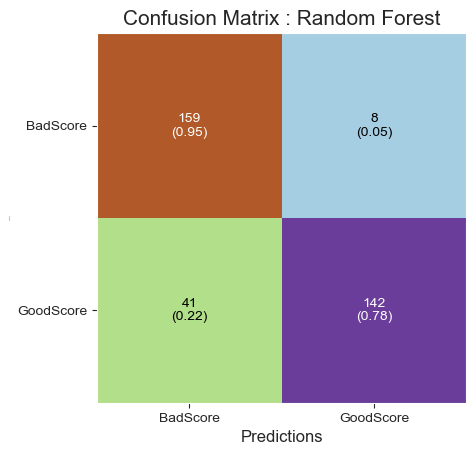

In [ ]:

print("\n**************Accuracy =",accuracy_score(y_test_res, pred),"**************\n")
print("**************F1-score =",f1_score(y_test_res, pred),"**************\n")
print(classification_report(y_test_res, pred))



labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_res, pred)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True,cmap='Paired')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=1)
plt.title('Confusion Matrix : Random Forest', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()



<font size = 3> ***SMOTE : Random Forest*** <font size = 3>

In [ ]:
categories_list,categories_index,int_list = categorize(X_train_smo) #function call
clf = RandomForestClassifier(random_state = 42)
pipe = scale_onehot(clf,categories_list,int_list)  #function call
pipe

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     importance_getter='feature_importances_',
                     n_features_to_select=20, step=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
#after tune
start_time = time.time()
CV_rfc1,pred1 = after_tune(X_test_smo,y_test_smo,X_train_smo,y_train_smo,clf,params)
print("\n Time Taken with hypertuned params = ",(time.time()-start_time))

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



 Best parameters for RandomForestClassifier(random_state=42) are: OrderedDict([('classifier__criterion', 'gini'), ('classifier__max_depth', 15), ('classifier__max_features', 'log2'), ('classifier__n_estimators', 250)])

 
 Accuracy of RandomForestClassifier(random_state=42) AFTER hyper parameter tuning:  0.8

 Time Taken with hypertuned params =  309.4095571041107



**************Accuracy = 0.8 **************

**************F1-score = 0.8011363636363636 **************

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       167
           1       0.83      0.77      0.80       183

    accuracy                           0.80       350
   macro avg       0.80      0.80      0.80       350
weighted avg       0.80      0.80      0.80       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/3328925056.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/3328925056.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


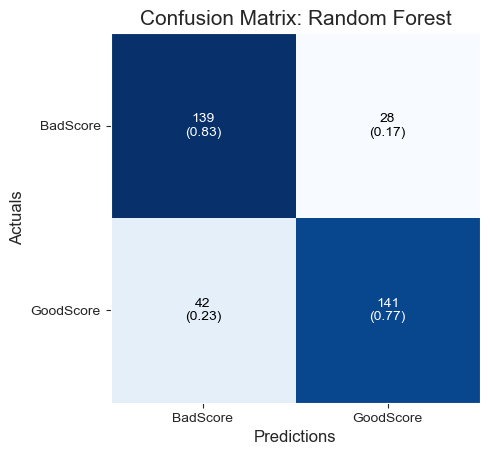

In [ ]:
print("\n**************Accuracy =",accuracy_score(y_test_smo, pred1),"**************\n")
print("**************F1-score =",f1_score(y_test_smo, pred1),"**************\n")
print(classification_report(y_test_smo, pred1))

labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_smo, pred1)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix: Random Forest', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()


<font size = 5> ***Cross-Validation : Random Forest *** </font>

In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoregrf = cross_val_score(CV_rfc, X_over,y_over,cv = skfold, scoring="accuracy",n_jobs=-1)
scoregrf1 = cross_val_score(CV_rfc, X_over,y_over,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoregrf2 = cross_val_score(CV_rfc, X_over,y_over,cv = skfold, scoring="precision",n_jobs=-1)
scoregrf3 = cross_val_score(CV_rfc, X_over,y_over,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of Random Forest Classifier with upsampled minority",scoregrf.mean())
print("Cross evaluation roc-auc of Random Forest Classifier with upsampled minority",scoregrf1.mean())
print("Cross evaluation precision of Random Forest Classifier with upsampled minority",scoregrf2.mean())
print("Cross evaluation recall of Random Forest Classifier with upsampled minority",scoregrf3.mean())


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of Random Forest Classifier with upsampled minority 0.8778571428571429
Cross evaluation roc-auc of Random Forest Classifier with upsampled minority 0.9613265306122448
Cross evaluation precision of Random Forest Classifier with upsampled minority 0.9172198606154257
Cross evaluation recall of Random Forest Classifier with upsampled minority 0.8314285714285713


In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoregrf4 = cross_val_score(CV_rfc1, X_smote,y_smote,cv = skfold, scoring="accuracy",n_jobs=-1)
scoregrf5 = cross_val_score(CV_rfc1, X_smote,y_smote,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoregrf6 = cross_val_score(CV_rfc1, X_smote,y_smote,cv = skfold, scoring="precision",n_jobs=-1)
scoregrf7 = cross_val_score(CV_rfc1, X_smote,y_smote,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of Random Forest Classifier with SMOTE ",scoregrf4.mean())
print("Cross evaluation roc-auc of Random Forest Classifier with SMOTE",scoregrf5.mean())
print("Cross evaluation precision of Random Forest Classifier with SMOTE",scoregrf6.mean())
print("Cross evaluation recall of Random Forest Classifier with SMOTE",scoregrf7.mean())



/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of Random Forest Classifier with SMOTE  0.795
Cross evaluation roc-auc of Random Forest Classifier with SMOTE 0.8777755102040817
Cross evaluation precision of Random Forest Classifier with SMOTE 0.8053563216148232
Cross evaluation recall of Random Forest Classifier with SMOTE 0.7785714285714285


<font size = 5> ***Model : Gradient Boosting Classifier***  </font> <br>

<font size = 3> Upsampled minority data <font size = 3>

In [ ]:
categories_list,categories_index,int_list = categorize(X_train_res)

clf = GradientBoostingClassifier(random_state = 42)     #set classifier
pipe = scale_onehot(clf,categories_list,int_list)    #function call
pipe

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection',
                 RFE(estimator=GradientBoostingClassifier(random_state=42),
                     importance_getter='feature_importances_',
                     n_features_to_select=20, step=5)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:

#after tune
params = {'classifier__learning_rate' : [0.01,0.02,0.03,.5,.1,.15,.2],
              'classifier__n_estimators' : [250,300,350,400],
              'classifier__max_depth' :[2,4,6,8,10],
              'classifier__subsample' : [0.9,0.5,0.2]
            }


start_time = time.time()
CV_gbc,pred_gb = after_tune(X_test_res,y_test_res,X_train_res,y_train_res,clf,params)  #function call
print("\n Time Taken with hypertuned params = ",(time.time()-start_time))



/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



 Best parameters for GradientBoostingClassifier(random_state=42) are: OrderedDict([('classifier__learning_rate', 0.01), ('classifier__max_depth', 10), ('classifier__n_estimators', 250), ('classifier__subsample', 0.9)])

 
 Accuracy of GradientBoostingClassifier(random_state=42) AFTER hyper parameter tuning:  0.8514285714285714

 Time Taken with hypertuned params =  458.1537322998047



**************Accuracy = 0.8514285714285714 **************

**************F1-score = 0.8424242424242423 **************

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       167
           1       0.95      0.76      0.84       183

    accuracy                           0.85       350
   macro avg       0.86      0.86      0.85       350
weighted avg       0.87      0.85      0.85       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/2313677898.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/2313677898.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


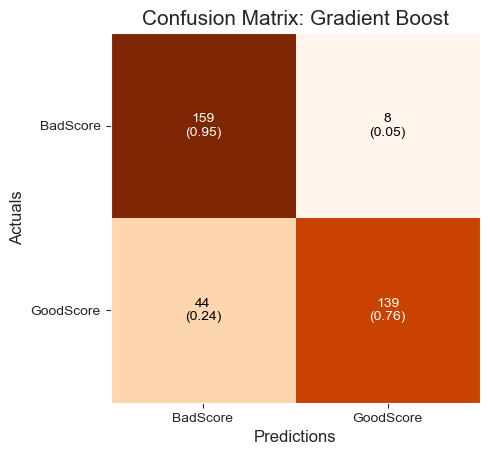

In [ ]:
print("\n**************Accuracy =",accuracy_score(y_test_res, pred_gb),"**************\n")
print("**************F1-score =",f1_score(y_test_res, pred_gb),"**************\n")
print(classification_report(y_test_res, pred_gb))

labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_res, pred_gb)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True,cmap = 'Oranges')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix: Gradient Boost', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()


<font size = 3> ***SMOTE : Gradient Boosting Classifier *** <font size = 3>

In [ ]:
categories_list,categories_index,int_list = categorize(X_train_smo)

pipe = scale_onehot(clf,categories_list,int_list)    #function call
pipe

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection',
                 RFE(estimator=GradientBoostingClassifier(random_state=42),
                     importance_getter='feature_importances_',
                     n_features_to_select=20, step=5)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:

#after tune
start_time = time.time()
CV_gbc1,pred_gb1 = after_tune(X_test_smo,y_test_smo,X_train_smo,y_train_smo,clf,params)     #function call
print("\n Time Taken with hypertuned params = ",(time.time()-start_time))




 Best parameters for GradientBoostingClassifier(random_state=42) are: OrderedDict([('classifier__learning_rate', 0.15), ('classifier__max_depth', 8), ('classifier__n_estimators', 300), ('classifier__subsample', 0.9)])

 
 Accuracy of GradientBoostingClassifier(random_state=42) AFTER hyper parameter tuning:  0.8342857142857143

 Time Taken with hypertuned params =  427.4058430194855



**************Accuracy = 0.8342857142857143 **************

**************F1-score = 0.8379888268156425 **************

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       167
           1       0.86      0.82      0.84       183

    accuracy                           0.83       350
   macro avg       0.83      0.83      0.83       350
weighted avg       0.84      0.83      0.83       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/820558719.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/820558719.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


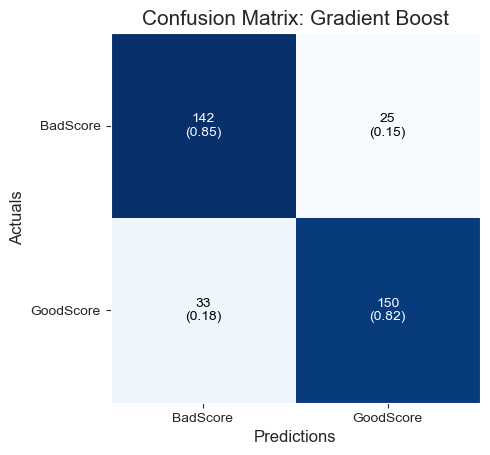

In [ ]:
print("\n**************Accuracy =",accuracy_score(y_test_smo, pred_gb1),"**************\n")
print("**************F1-score =",f1_score(y_test_smo, pred_gb1),"**************\n")
print(classification_report(y_test_smo, pred_gb1))

labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_smo, pred_gb1)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix: Gradient Boost', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<font size = 5> ***Cross-Validation : Gradient Boosting Classifier *** </font>

In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoregb = cross_val_score(CV_gbc, X_over,y_over,cv = skfold, scoring="accuracy",n_jobs=-1)
scoregb1 = cross_val_score(CV_gbc, X_over,y_over,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoregb2 = cross_val_score(CV_gbc, X_over,y_over,cv = skfold, scoring="precision",n_jobs=-1)
scoregb3 = cross_val_score(CV_gbc, X_over,y_over,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of Gradient Boosting Classifier with upsampled minority",scoregb.mean())
print("Cross evaluation roc-auc of Gradient Boosting Classifier with upsampled minority",scoregb1.mean())
print("Cross evaluation precision of Gradient Boosting Classifier with upsampled minority",scoregb2.mean())
print("Cross evaluation recall score of Gradient Boosting Classifier with upsampled minority ",scoregb3.mean())


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of Gradient Boosting Classifier with upsampled minority 0.8957142857142856
Cross evaluation roc-auc of Gradient Boosting Classifier with upsampled minority 0.959530612244898
Cross evaluation precision of Gradient Boosting Classifier with upsampled minority 0.9214954832016179
Cross evaluation recall score of Gradient Boosting Classifier with upsampled minority  0.8657142857142857


In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoregb4 = cross_val_score(CV_gbc1, X_smote,y_smote,cv = skfold, scoring="accuracy",n_jobs=-1)
scoregb5 = cross_val_score(CV_gbc1, X_smote,y_smote,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoregb6 = cross_val_score(CV_gbc1, X_smote,y_smote,cv = skfold, scoring="precision",n_jobs=-1)
scoregb7 = cross_val_score(CV_gbc1, X_smote,y_smote,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of Gradient Boosting Classifier with SMOTE ",scoregb4.mean())
print("Cross evaluation roc-auc score of Gradient Boosting Classifier with SMOTE",scoregb5.mean())
print("Cross evaluation precision of Gradient Boosting Classifier with SMOTE",scoregb6.mean())
print("Cross evaluation recall of Gradient Boosting Classifier with SMOTE",scoregb7.mean())


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of Gradient Boosting Classifier with SMOTE  0.8057142857142857
Cross evaluation roc-auc score of Gradient Boosting Classifier with SMOTE 0.8994897959183674
Cross evaluation precision of Gradient Boosting Classifier with SMOTE 0.809937224245693
Cross evaluation recall of Gradient Boosting Classifier with SMOTE 0.8014285714285714


<font size = 5> ***Model : Support Vector Classifier ***  </font> <br>

<font size = 3> Upsampled minority data <font size = 3>

In [ ]:
categories_list,categories_index,int_list = categorize(X_train_res)
clf = SVC(random_state = 42)

pipe = scale_onehot(clf,categories_list,int_list)
pipe


Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection', SelectKBest(k=20)),
                ('classifier', SVC(random_state=42))])

In [ ]:

#after tune
gamma_range = np.logspace(-9, 3, 20)
params = {'classifier__kernel' : ['rbf','sigmoid', 'linear'],
              'classifier__C' : [0.1,.2, .5,1,1.2,1.3,1.4,1.5,1.6,1.7,2],
              'classifier__gamma' : gamma_range }

start_time = time.time()
CV_svc,pred_svc = after_tune(X_test_res,y_test_res,X_train_res,y_train_res,clf,params)    #function call
print("\n Time Taken with hypertuned params = ",(time.time()-start_time))


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



 Best parameters for SVC(random_state=42) are: OrderedDict([('classifier__C', 1.4), ('classifier__gamma', 1000.0), ('classifier__kernel', 'rbf')])

 
 Accuracy of SVC(random_state=42) AFTER hyper parameter tuning:  0.92

 Time Taken with hypertuned params =  50.81860709190369



**************Accuracy = 0.92 **************

**************F1-score = 0.9289340101522843 **************

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       167
           1       0.87      1.00      0.93       183

    accuracy                           0.92       350
   macro avg       0.93      0.92      0.92       350
weighted avg       0.93      0.92      0.92       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/3278399665.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/3278399665.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


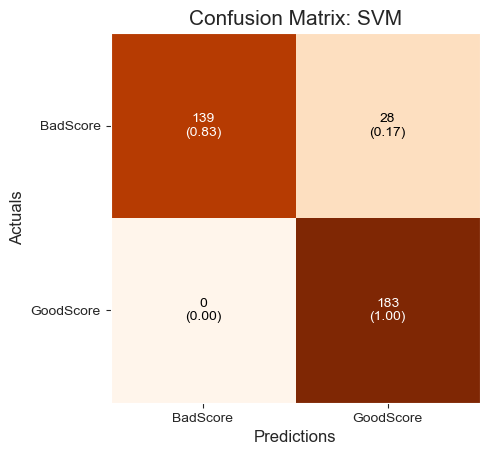

In [ ]:
print("\n**************Accuracy =",accuracy_score(y_test_res, pred_svc),"**************\n")
print("**************F1-score =",f1_score(y_test_res, pred_svc),"**************\n")
print(classification_report(y_test_res, pred_svc))

labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_res, pred_svc)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True,cmap = 'Oranges')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix: SVM', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()



<font size = 3> ***SMOTE : Support Vector Classifier *** <font size = 3>

In [ ]:
categories_list,categories_index,int_list = categorize(X_train_smo)

clf = SVC(random_state = 42)
pipe = scale_onehot(clf,categories_list,int_list)

pipe

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_month',
                                                   'credit_amount',
                                                   'installment_rate',
                                                   'resident_since', 'age',
                                                   'existing_cards',
                                                   'liability_count']),
                                                 ('cat_transform',
                                                  OneHotEncoder(drop='first'),
                                                  ['checking_acc',
                                                   'credit_hist', 'purpose',
                                                   'savings',
                                                   'employment_history', 'sex',
                                                   'loan_status', 'property',
                                                   'installment_plan',
                                                   'housing_type', 'job',
                                                   'telephone',
                                                   'foreign_worker'])])),
                ('feature selection', SelectKBest(k=20)),
                ('classifier', SVC(random_state=42))])

In [ ]:

#after tune
start_time = time.time()
CV_svc1,pred_svc1 = after_tune(X_test_smo,y_test_smo,X_train_smo,y_train_smo,clf,params)    #function call
print("\n Time Taken with hypertuned params = ",(time.time()-start_time))

/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



 Best parameters for SVC(random_state=42) are: OrderedDict([('classifier__C', 0.5), ('classifier__gamma', 54.555947811685144), ('classifier__kernel', 'linear')])

 
 Accuracy of SVC(random_state=42) AFTER hyper parameter tuning:  0.76

 Time Taken with hypertuned params =  47.979984998703



**************Accuracy = 0.76 **************

**************F1-score = 0.7454545454545455 **************

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       167
           1       0.84      0.67      0.75       183

    accuracy                           0.76       350
   macro avg       0.77      0.76      0.76       350
weighted avg       0.77      0.76      0.76       350



/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/545876290.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/bb/7zb9p54j0796393z63nlnt900000gn/T/ipykernel_27260/545876290.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


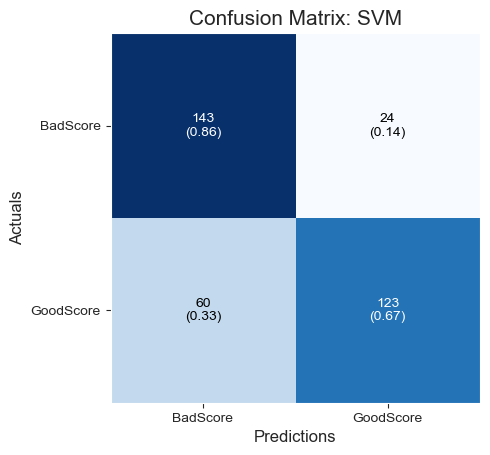

In [ ]:
print("\n**************Accuracy =",accuracy_score(y_test_smo, pred_svc1),"**************\n")
print("**************F1-score =",f1_score(y_test_smo, pred_svc1),"**************\n")
print(classification_report(y_test_smo, pred_svc1))

labels= ['BadScore','GoodScore']
confusion_matrix = metrics.confusion_matrix(y_test_smo, pred_svc1)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,show_normed = True)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix: SVM', fontsize=15)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<font size = 5> ***Cross-Validation : SVC *** </font>

In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoresvc = cross_val_score(CV_svc, X_over,y_over,cv = skfold, scoring="accuracy",n_jobs=-1)
scoresvc1 = cross_val_score(CV_svc, X_over,y_over,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoresvc2 = cross_val_score(CV_svc, X_over,y_over,cv = skfold, scoring="precision",n_jobs=-1)
scoresvc3 = cross_val_score(CV_svc, X_over,y_over,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of SVC with upsampled minority ",scoresvc.mean())
print("Cross evaluation roc-auc score of SVC with upsampled minority",scoresvc1.mean())
print("Cross evaluation precision of SVC with upsampled minority",scoresvc2.mean())
print("Cross evaluation recall of SVC with upsampled minority",scoresvc3.mean())


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of SVC with upsampled minority  0.9257142857142858
Cross evaluation roc-auc score of SVC with upsampled minority 0.9364795918367348
Cross evaluation precision of SVC with upsampled minority 0.871647985479201
Cross evaluation recall of SVC with upsampled minority 1.0


In [ ]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)
scoresvc4 = cross_val_score(CV_svc1, X_smote,y_smote,cv = skfold, scoring="accuracy",n_jobs=-1)
scoresvc5 = cross_val_score(CV_svc1, X_smote,y_smote,cv = skfold, scoring="roc_auc",n_jobs=-1)
scoresvc6 = cross_val_score(CV_svc1, X_smote,y_smote,cv = skfold, scoring="precision",n_jobs=-1)
scoresvc7 = cross_val_score(CV_svc1, X_smote,y_smote,cv = skfold, scoring="recall",n_jobs=-1)
print("Cross evaluation accuracy score of SVC with SMOTE ",scoresvc4.mean())
print("Cross evaluation roc-auc score of SVC with SMOTE",scoresvc5.mean())
print("Cross evaluation precision of SVC with SMOTE",scoresvc6.mean())
print("Cross evaluation recall of SVC with SMOTE",scoresvc7.mean())


/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

Cross evaluation accuracy score of SVC with SMOTE  0.7628571428571428
Cross evaluation roc-auc score of SVC with SMOTE 0.837326530612245
Cross evaluation precision of SVC with SMOTE 0.7877529585569033
Cross evaluation recall of SVC with SMOTE 0.7228571428571428


In [ ]:
scoresf1rf = cross_val_score(CV_rfc, X_over,y_over,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of Random Forest with oversampled data ",scoresf1rf.mean())
scoresf1rf1 = cross_val_score(CV_rfc1, X_smote,y_smote,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of Random Forest with SMOTE ",scoresf1rf1.mean())

scoresf1gb = cross_val_score(CV_gbc, X_over,y_over,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of Gradient boost with oversampled data ",scoresf1gb.mean())
scoresf1gb1 = cross_val_score(CV_gbc1, X_smote,y_smote,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of Gradient boost with SMOTE ",scoresf1gb1.mean())

scoresf1svc = cross_val_score(CV_svc, X_over,y_over,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of SVC with oversampled data",scoresf1svc.mean())
scoresf1svc1 = cross_val_score(CV_svc1, X_smote,y_smote,cv = skfold, scoring="f1",n_jobs=-1)
print("Cross evaluation F score of SVC with SMOTE ",scoresf1svc1.mean())

Cross evaluation F score of Random Forest with oversampled data  0.879100634848132
Cross evaluation F score of Random Forest with SMOTE  0.7800731310673191
Cross evaluation F score of Gradient boost with oversampled data  0.8823395666058216
Cross evaluation F score of Gradient boost with SMOTE  0.8119692116558845
Cross evaluation F score of SVC with oversampled data 0.923320221872806
Cross evaluation F score of SVC with SMOTE  0.7438972404490507


<font size = 5> Plot ROC Curve </font>

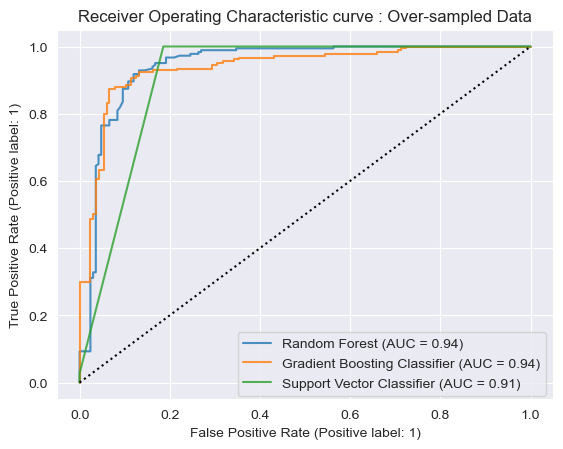

In [ ]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(CV_rfc, X_test_res, y_test_res,ax=ax ,alpha=0.8,name = "Random Forest")
rfc_disp = RocCurveDisplay.from_estimator(CV_gbc, X_test_res, y_test_res,ax= ax, alpha=0.8,name = "Gradient Boosting Classifier")
rfc_disp = RocCurveDisplay.from_estimator(CV_svc, X_test_res, y_test_res, ax=ax, alpha=0.8,name = "Support Vector Classifier")
plt.plot([0, 1], [0, 1], ':k')
plt.legend(bbox_to_anchor=(0.35, .2), loc="upper left")
_ = rfc_disp.ax_.set_title("Receiver Operating Characteristic curve : Over-sampled Data")
plt.show()




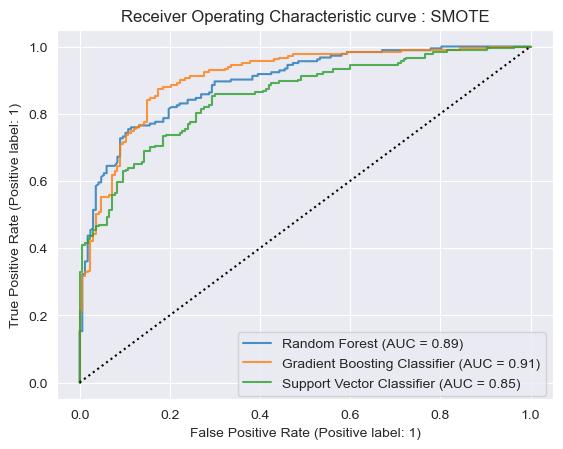

In [ ]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(CV_rfc1, X_test_smo, y_test_smo,ax=ax ,alpha=0.8,name = "Random Forest")
rfc_disp = RocCurveDisplay.from_estimator(CV_gbc1, X_test_smo, y_test_smo,ax= ax, alpha=0.8,name = "Gradient Boosting Classifier")
rfc_disp = RocCurveDisplay.from_estimator(CV_svc1, X_test_smo, y_test_smo, ax=ax, alpha=0.8,name = "Support Vector Classifier")
plt.plot([0, 1], [0, 1], ':k')
#rfc_disp.plot(alpha=0.8)
plt.legend(bbox_to_anchor=(0.35, .2), loc="upper left")
_ = rfc_disp.ax_.set_title("Receiver Operating Characteristic curve : SMOTE")
plt.show()




<font size = 20>***Summary***</font>


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)